In [64]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans
from PIL import Image

In [65]:
def kmeans_sklearn(img_1d, img, k_cluster, init_centroids = 'random'):
    start_time = time.time()
    width , height = img.size
    kmeans = KMeans(n_clusters = k_cluster, init = 'k-means++', n_init = 'auto')
    kmeans.fit(img_1d)
    end_time = time.time()
    print("Run time: ", end_time - start_time)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape((height, width, 3))
    plt.title("kmeans_sklearn")
    plt.axis('off')
    plt.imshow(segmented_img / 255)

In [66]:
def kmeans(img_1d, k_clusters, max_iter = 300, init_centroids='random'):   
    height_width , channels = img_1d.shape

    # Check the init centroids
    if init_centroids == 'random':
        # randomly pick k rows of int from 0 to 256
        centroids = np.random.randint(0, 256, (k_clusters, 3)) 
    elif init_centroids == 'in_pixels':
        # randomly pick k rows of img_1d as initial centers
        rand_centroid = np.random.choice(range(height_width), k_clusters, replace = False)
        centroids = img_1d[rand_centroid]
    else:
        raise ValueError("Invalid option: 'random' or 'in_pixels'")
    for _ in range(max_iter):
        # Calculating distances between pixels and centroid
        distances = np.linalg.norm(img_1d[:, np.newaxis] - centroids, axis = 2) # 2D array ; [:, np.newaxis] From 1D to 2D 

        # Determine which pixel for which (closest) centroids
        labels = np.argmin(distances, axis = 1) # 1D array to return the min index found of the 2D distances array

        # Calculate centroids by taking the mean of pixels is assigned 
        temp_centroids = np.array([np.mean(img_1d[labels == k] if np.any(labels == k) else centroids, axis = 0) for k in range(k_clusters)])
        
        # The centroids don't change or change a bit then break the loop
        if np.allclose(centroids, temp_centroids, atol = 0.1):
            break
    
        centroids = temp_centroids
    
    return centroids, labels


In [67]:
# From centroids and labels to compressed image
def centroids_to_image(centroids, labels, img):
    width, height = img.size
    new_img = centroids[labels]
    new_img = new_img.reshape((height, width, 3))
    return new_img


In [68]:
# Take input from user
def user_input():
    img_name = input('Image name: ')
    k_clusters = int(input('Numbers of clusters: '))
    max_iter = int(input('Max iterator: '))
    init_centroids = input("Init centroids (random or in_pixels): ")
    file_extension  = input("Image output extension (png or pdf): ")
    
    return img_name, k_clusters, max_iter, init_centroids, file_extension

In [69]:
# pre-process for image
def img_process(img_name):
    img = Image.open(img_name)
    img_array = np.array(img)
    plt.imshow(img)
    plt.title('Original image')
    plt.axis('off')
    plt.show()
    return img_array.reshape(-1, 3), img

In [70]:
def export_img(new_img, file_extension):
    img = Image.fromarray(new_img.astype(np.uint8))
    if file_extension == 'pdf':
    # Save as PDF
        img.save('output.pdf')
    elif file_extension == 'png':
    # Save as PNG
        img.save('output.png') 
    plt.imshow(new_img.astype(np.uint8))
    plt.title('kmeans')
    plt.axis('off')
    plt.show()

In [71]:
def main():
    img_name, k_clusters, max_iter, init_centroids, file_extension = user_input()
    img_1d, img = img_process(img_name)
    start = time.time()
    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)
    end = time.time()
    print('kmeans time(s): ', (end - start))
    new_img = centroids_to_image(centroids, labels, img)
    export_img(new_img, file_extension)
    kmeans_sklearn(img_1d, img, k_clusters, init_centroids)
    
    

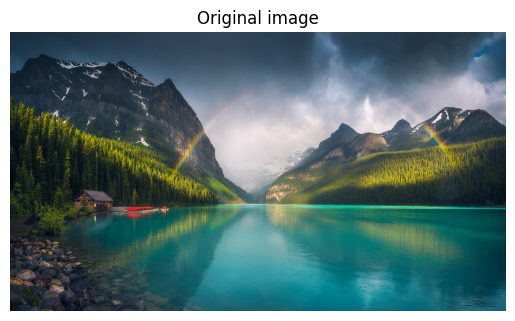

kmeans time(s):  19.601322174072266


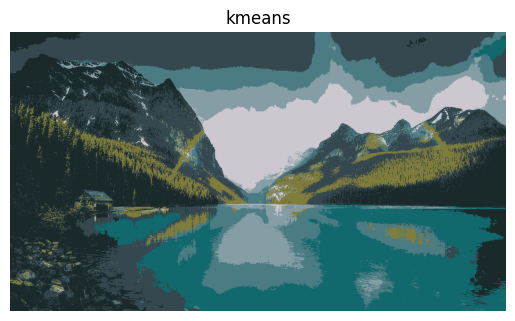

Run time:  1.605513572692871


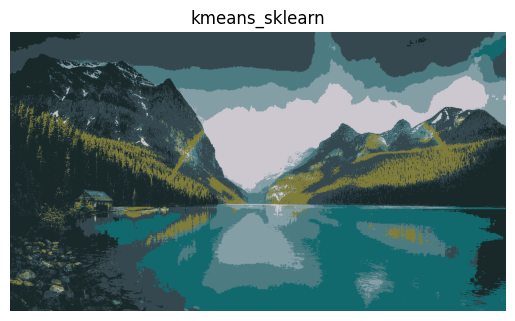

In [72]:
if __name__ == "__main__":
    main()